In [6]:
# --- 核心库 ---
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
import io
from IPython.display import display, Image
import cfgrib # 直接导入 cfgrib 库

# --- 加载项目模块 ---
try:
    from chromasky_toolkit import config
    from chromasky_toolkit.map_drawer import generate_map_from_grid
except ImportError:
    import sys
    src_path = str(Path.cwd().parent / 'src')
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    from chromasky_toolkit import config
    from chromasky_toolkit.map_drawer import generate_map_from_grid
    
print("✅ 环境设置完毕。")

✅ 环境设置完毕。


In [7]:
# --- 指定要分析的目标文件 ---
# !! 请根据你实际下载的路径修改这里 !!
grib_file_path = config.GFS_DATA_DIR / "20250807_t00z" / "today_1900_f011" / "forecast_data.grib2"


In [8]:

print("--- STARTING FINAL DEBUG (V3) ---")
print(f"Target file: {grib_file_path}")

if not grib_file_path.exists():
    print("❌ FATAL: GRIB file does not exist at the specified path. Please check the path.")
else:
    try:
        # --- 关键修正：直接将文件路径传递给 FileStream ---
        print(f"✅ File exists. Creating cfgrib.FileStream directly from path...")
        
        # 我们不再手动 open 文件，让 cfgrib 自己处理
        stream = cfgrib.FileStream(str(grib_file_path)) 
        
        print("   Stream created. Starting to iterate using stream.items()...")
        # --- 修正结束 ---
        
        message_count = 0
        for offset, msg in stream.items():
            message_count += 1
            print(f"\n--- Processing message #{message_count} (Offset: {offset}) ---")
            
            msg_dict = {key: value for key, value in msg.items()}
            
            level_type = msg_dict.get('typeOfLevel', 'N/A')
            short_name = msg_dict.get('shortName', 'N/A')
            print(f"   > Found: shortName='{short_name}', typeOfLevel='{level_type}'")

            if message_count >= 5:
                print("\n--- Processed first 5 messages successfully. Stopping debug loop. ---")
                break
    
        print("\n✅✅✅ FINAL DEBUG SUCCEEDED! The file handling logic is now correct. ✅✅✅")

    except Exception as e:
        print("\n" + "!"*20 + " AN ERROR OCCURRED " + "!"*20)
        raise

--- STARTING FINAL DEBUG (V3) ---
Target file: /Users/zhangchao/Documents/Code/github/chromasky-toolkit/src/data/raw/gfs/20250807_t00z/today_1900_f011/forecast_data.grib2
✅ File exists. Creating cfgrib.FileStream directly from path...
   Stream created. Starting to iterate using stream.items()...

--- Processing message #1 (Offset: 0) ---
   > Found: shortName='gh', typeOfLevel='isobaricInPa'

--- Processing message #2 (Offset: 99294) ---
   > Found: shortName='gh', typeOfLevel='isobaricInPa'

--- Processing message #3 (Offset: 198588) ---
   > Found: shortName='gh', typeOfLevel='isobaricInPa'

--- Processing message #4 (Offset: 297882) ---
   > Found: shortName='gh', typeOfLevel='isobaricInPa'

--- Processing message #5 (Offset: 397176) ---
   > Found: shortName='gh', typeOfLevel='isobaricInPa'

--- Processed first 5 messages successfully. Stopping debug loop. ---

✅✅✅ FINAL DEBUG SUCCEEDED! The file handling logic is now correct. ✅✅✅


ECCODES ERROR   :  Message validity checks: Second fixed surface: If the type of surface is missing so should its scaleFactor/scaledValue keys
ECCODES ERROR   :  Message validity checks: Second fixed surface: If the type of surface is missing so should its scaleFactor/scaledValue keys
ECCODES ERROR   :  Message validity checks: Second fixed surface: If the type of surface is missing so should its scaleFactor/scaledValue keys
ECCODES ERROR   :  Message validity checks: Second fixed surface: If the type of surface is missing so should its scaleFactor/scaledValue keys
ECCODES ERROR   :  Message validity checks: Second fixed surface: If the type of surface is missing so should its scaleFactor/scaledValue keys


In [9]:
import cfgrib # 确保 cfgrib 已导入

def analyze_grib_file(file_path: Path):
    """
    分析 GRIB2 文件并打印出可用的变量及其所在的高度层类型。
    *** 基于最终的成功调试结果构建 ***
    """
    if not file_path.exists():
        print(f"❌ 文件不存在: {file_path}")
        return

    print(f"--- 正在分析 GRIB 文件: {file_path.name} ---")
    
    analysis_results = {}
    try:
        # 1. 直接将文件路径传递给 FileStream
        stream = cfgrib.FileStream(str(file_path))
        
        # 2. 使用 .items() 进行迭代
        for offset, msg in stream.items():
            msg_dict = {key: value for key, value in msg.items()}
            level_type = msg_dict.get('typeOfLevel', 'unknown_level')
            var_short_name = msg_dict.get('shortName', 'unknown_var')
            var_long_name = msg_dict.get('name', 'N/A')
            
            if level_type not in analysis_results:
                analysis_results[level_type] = set()
            analysis_results[level_type].add((var_short_name, var_long_name))
            
        # 3. 打印分析结果
        print("\n【文件中包含的高度层类型 (typeOfLevel)】:")
        for level in sorted(analysis_results.keys()):
            print(f"- {level}")
        
        print("\n【各高度层类型下的变量】:")
        for level in sorted(analysis_results.keys()):
            print(f"\n--- 在层级 '{level}' 上 ---")
            for short_name, long_name in sorted(analysis_results[level]):
                print(f"  - {short_name:<10} ({long_name})")

    except Exception as e:
        print(f"❌ 分析文件时发生错误: {e}")

/Users/zhangchao/Documents/Code/github/chromasky-toolkit/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(



开始为文件 forecast_data.grib2 批量可视化...
--- 正在加载变量 'hcc' from level 'highCloudLayer' ---


2025-08-07 14:30:27,601 - MapDrawer - INFO - --- [绘图] 开始生成地图: High cloud cover
Forecast for 2025-08-07 00:00 UTC (F011) ---
2025-08-07 14:30:30,507 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: /Users/zhangchao/Documents/Code/github/chromasky-toolkit/src/data/raw/gfs/20250807_t00z/today_1900_f011/forecast_data_hcc.png ---
/Users/zhangchao/Documents/Code/github/chromasky-toolkit/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CF

--- 正在加载变量 'mcc' from level 'middleCloudLayer' ---


2025-08-07 14:30:32,633 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: /Users/zhangchao/Documents/Code/github/chromasky-toolkit/src/data/raw/gfs/20250807_t00z/today_1900_f011/forecast_data_mcc.png ---
/Users/zhangchao/Documents/Code/github/chromasky-toolkit/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
2025-08-07 14:30:32,643 - MapDraw

--- 正在加载变量 'lcc' from level 'lowCloudLayer' ---


2025-08-07 14:30:34,424 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: /Users/zhangchao/Documents/Code/github/chromasky-toolkit/src/data/raw/gfs/20250807_t00z/today_1900_f011/forecast_data_lcc.png ---



所有地图已生成，正在并排显示...


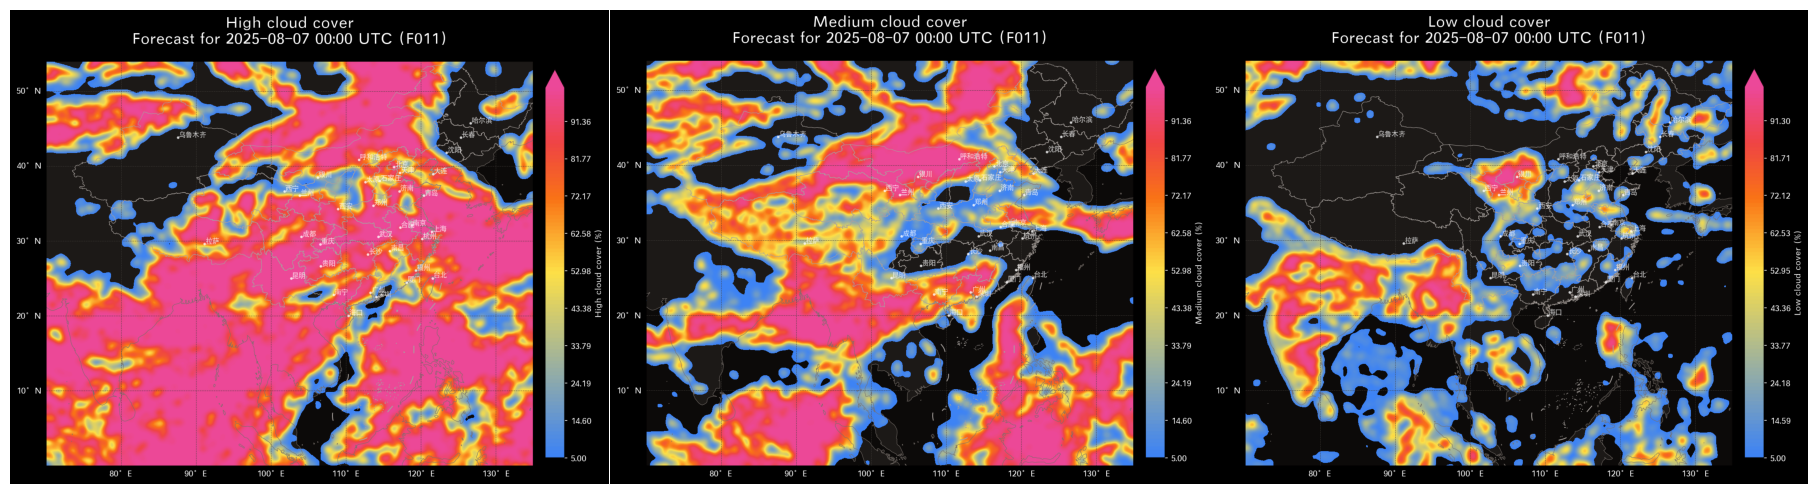

In [10]:
# 单元格 4: 执行批量可视化 (这个代码是正确的，无需修改)

variables_to_visualize = {
    'hcc': 'highCloudLayer',
    'mcc': 'middleCloudLayer',
    'lcc': 'lowCloudLayer'
}
# --- 批量可视化流程 ---
if not grib_file_path.exists():
    print(f"❌ 目标 GRIB 文件不存在，无法执行可视化。")
else:
    print(f"\n" + "="*80)
    print(f"开始为文件 {grib_file_path.name} 批量可视化...")
    generated_images = []
    
    # --- 从文件路径中解析出预报时效信息 ---
    # 示例路径: .../today_1900_f017/forecast_data.grib2
    # grib_file_path.parent.name -> 'today_1900_f017'
    try:
        forecast_hour_str = grib_file_path.parent.name.split('_f')[-1]
        forecast_hour_info = f"(F{forecast_hour_str})"
    except (IndexError, ValueError):
        forecast_hour_info = "" # 如果解析失败，则不显示
        print("⚠️ 无法从文件名中解析预报时效。")
    # --- 解析结束 ---

    try:
        for variable, level_type in variables_to_visualize.items():
            print(f"--- 正在加载变量 '{variable}' from level '{level_type}' ---")
            ds_level = xr.load_dataset(grib_file_path, engine="cfgrib", filter_by_keys={'typeOfLevel': level_type})
            
            if variable in ds_level.data_vars:
                data_slice = ds_level[variable]
                
                # --- 关键修改：更新标题格式 ---
                long_name = data_slice.attrs.get('long_name', variable.upper())
                forecast_time = pd.to_datetime(data_slice.time.values).strftime('%Y-%m-%d %H:%M UTC')
                
                # 将预报时效信息加入标题
                map_title = f"{long_name}\nForecast for {forecast_time} {forecast_hour_info}"
                # --- 修改结束 ---
                
                map_output_path = grib_file_path.parent / f"{grib_file_path.stem}_{variable}.png"
                
                image_bytes = generate_map_from_grid(data_slice, map_title, map_output_path)
                if image_bytes:
                    generated_images.append(image_bytes)
            else:
                print(f"⚠️ 变量 '{variable}' 在层级 '{level_type}' 中未找到，跳过。")
    except Exception as e:
        print(f"处理 GRIB 文件时发生严重错误: {e}")
        
    # --- 并排显示图像 (这部分逻辑完全不变) ---
    if generated_images:
        print("\n" + "="*80 + "\n所有地图已生成，正在并排显示...")
        num_images = len(generated_images)
        fig, axes = plt.subplots(1, num_images, figsize=(6 * num_images, 6))
        if num_images == 1: axes = [axes]
        for i, img_bytes in enumerate(generated_images):
            axes[i].imshow(plt.imread(io.BytesIO(img_bytes)))
            axes[i].axis('off')
        plt.tight_layout(pad=0.1)
        plt.show()